In [2]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

In [3]:
device = th.device('cpu')

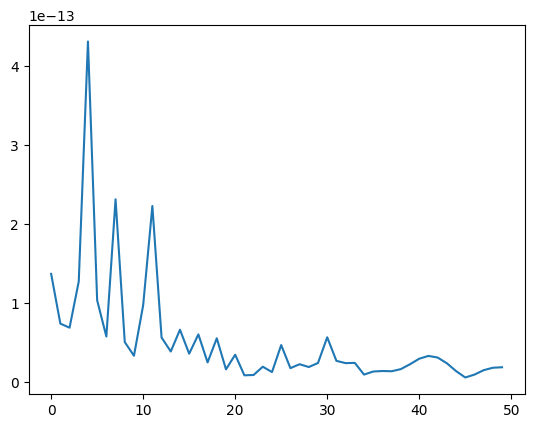

In [6]:
P = 1
R = 1
Q = 100
N1 = 10
N2 = 15
N3 = 10
N4 = 50

METER = 1e8
SEC = 1
LAMBDA = 670e-9 * METER
K = 2 * np.pi / LAMBDA

dtype = th.complex128

width1, width2, width3, width4 = 85e-6 * METER, 85e-6 * METER, 1778e-6 * METER, 85e-6 * METER
x1, x2 = 0.009815 * METER, 0.489 * METER
position1 = np.linspace(1e-3 * METER, 10e-3 * METER, N1)
position2 = np.linspace(2e-3 * METER, 10e-3 * METER, N2)
position3 = np.linspace(1e-3 * METER, 10e-3 * METER, N3)
position4 = np.linspace(-1e-0 * METER, 10e-0 * METER, N4)

field1 = th.tensor(np.linspace(position1, position1 + width1, P), dtype=dtype, device=device)
field2 = th.tensor(np.linspace(position2, position2 + width2, P), dtype=dtype, device=device)
field3 = th.tensor(np.linspace(position3, position3 + width3, Q), dtype=dtype, device=device)
field4 = th.tensor(np.linspace(position4, position4 + width4, R), dtype=dtype, device=device)

E1 = th.ones_like(field1, dtype=dtype, device=device) # P, N1
E2 = th.ones_like(field2, dtype=dtype, device=device)
R1 = th.tile(field1, (Q, N3)).view(Q, P, N3, N1)
R2 = th.tile(field2, (Q, N3)).view(Q, P, N3, N2)
R3 = th.tile(field3, (P, N4)).view(P, Q, N4, N3).permute((1, 0, 3, 2))

D1 = R1[..., None] - R3[..., None, :] # Q, P, N3, N1, N4
D2 = R2[..., None] - R3[..., None, :] # Q, P, N3, N2, N4
D1 = th.sqrt(x1 ** 2 + D1 ** 2)
D2 = th.sqrt(x1 ** 2 + D2 ** 2)
E3 = th.einsum("qpmnl,pn->qmnl", th.exp(1j * D1 * K) / D1, E1)[..., None, :] + th.einsum("qpmnl,pn->qmnl", th.exp(1j * D2 * K) / D2, E2)[..., None, :, :]
# E3 Q, N3, N1, N2, N4

R3 = th.tile(field3, (R, N4)).view(R, Q, N4, N3)
R4 = th.tile(field4, (Q, N3)).view(Q, R, N3, N4).permute((1, 0, 3, 2))

D3 = R3 - R4 # R, Q, N4, N3
D3 = th.sqrt(x2 ** 2 + D3 ** 2)
E4 = th.einsum("rqnm,qmlkn->rlkmn", th.exp(1j * D3 * K) / D3, E3)
# E4 R, N1, N2, N3, N4
result = th.abs(E4)
result = th.sum(result, dim=0)
plot(result[5, 11, 5, :].to("cpu").numpy())

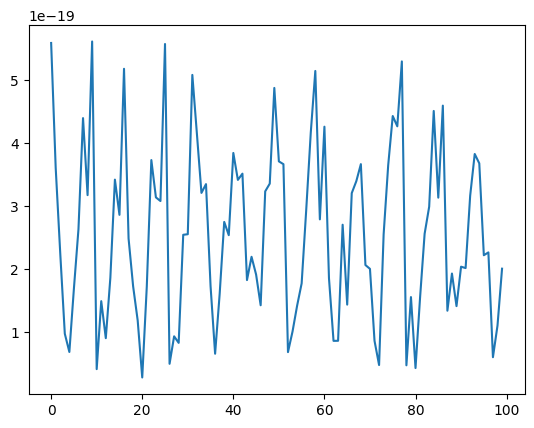

In [12]:
P = 1
R = 1
Q = 100
N1 = 1
N2 = 1
N3 = 1
N4 = 100

METER = 1e11
SEC = 1
LAMBDA = 670e-9 * METER
K = 2 * np.pi / LAMBDA

dtype = th.complex128

width1, width2, width3, width4 = 85e-6 * METER, 85e-6 * METER, 1778e-6 * METER, 85e-6 * METER
x1, x2 = 0.009815 * METER, 0.489 * METER
position1 = np.linspace(5e-3 * METER, 10e-3 * METER, N1)
position2 = np.linspace(5.5e-3 * METER, 10e-3 * METER, N2)
position3 = np.linspace(4.7e-3 * METER, 10e-3 * METER, N3)
position4 = np.linspace(-50e-3 * METER, 30e-3 * METER, N4)

field1 = th.tensor(np.linspace(position1, position1 + width1, P), dtype=dtype, device=device)
field2 = th.tensor(np.linspace(position2, position2 + width2, P), dtype=dtype, device=device)
field3 = th.tensor(np.linspace(position3, position3 + width3, Q), dtype=dtype, device=device)
field4 = th.tensor(np.linspace(position4, position4 + width4, R), dtype=dtype, device=device)

E1 = th.ones_like(field1, dtype=dtype, device=device) # P, N1
E2 = th.ones_like(field2, dtype=dtype, device=device)
R1 = th.tile(field1, (Q, N3)).view(Q, P, N3, N1)
R2 = th.tile(field2, (Q, N3)).view(Q, P, N3, N2)
R3 = th.tile(field3, (P, N4)).view(P, Q, N4, N3).permute((1, 0, 3, 2))

D1 = R1[..., None] - R3[..., None, :] # Q, P, N3, N1, N4
D2 = R2[..., None] - R3[..., None, :] # Q, P, N3, N2, N4
D1 = th.sqrt(x1 ** 2 + D1 ** 2)
D2 = th.sqrt(x1 ** 2 + D2 ** 2)
E3 = th.einsum("qpmnl,pn->qmnl", th.exp(1j * D1 * K) / D1, E1)[..., None, :] + th.einsum("qpmnl,pn->qmnl", th.exp(1j * D2 * K) / D2, E2)[..., None, :, :]
# E3 Q, N3, N1, N2, N4

R3 = th.tile(field3, (R, N4)).view(R, Q, N4, N3)
R4 = th.tile(field4, (Q, N3)).view(Q, R, N3, N4).permute((1, 0, 3, 2))

D3 = R3 - R4 # R, Q, N4, N3
D3 = th.sqrt(x2 ** 2 + D3 ** 2)
E4 = th.einsum("rqnm,qmlkn->rlkmn", th.exp(1j * D3 * K) / D3, E3)
# E4 R, N1, N2, N3, N4
result = th.abs(E4)
result = th.sum(result, dim=0)
plot(result[0,0,0, :].to("cpu").numpy())